In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
noise_power_density = 5.0119e-21
W = 10e6 # bandwidth (unit:Hz)
circuit_power = 1 # constant circuit power of transmitter (unit: Watt)

In [18]:
def spectral_efficiency(P, h, N0, bandwidth):
    """
    Calculate the total spectral efficiency for two transmitters.
    Parameters:
    - P: Array of transmit powers [P1, P2]
    - h: Array of channel gains [h11, h12, h21, h22] (first number is index of tx, second is index of rx)
    - N0: Noise power density
    - W: Bandwidth

    Returns:
    - Total spectral efficiency
    """
    P1, P2 = P
    # h11, h12, h21, h22 = h
    h11, h12, h21, h22 = h

    epsilon=1e-10

    # Calculate SE1 and SE2, ensure the arguments in np.log2 are positive
    term1 = max(epsilon, 1 + h11 * P1 / (N0 * bandwidth + h21 * P2 + epsilon))
    term2 = max(epsilon, 1 + h22 * P2 / (N0 * bandwidth + h12 * P1 + epsilon))
    
    SE1 = np.log2(term1)
    SE2 = np.log2(term2)
    
    total_SE = SE1 + SE2

    return total_SE

In [21]:
def energy_efficiency(P, h, N0, bandwidth, Pc):
    """
    Calculate the energy efficiency for two transmitters.

    Parameters:
    - P: Array of transmit powers [P1, P2]
    - h: Array of channel gains [h11, h12, h21, h22]
    - N0: Noise power density
    - W: Bandwidth
    - Pc: Constant circuit power of the transmitter

    Returns:
    - Energy efficiency (EE)
    """
    h11, h12, h21, h22 = h
    P1, P2 = P
    epsilon=1e-10

    # # Calculate the spectral efficiencies for the given power configuration
    # SE1 = np.log2(1 + h11 * P1 / (N0 * bandwidth + h21 * P2 + epsilon))
    # SE2 = np.log2(1 + h22 * P2 / (N0 * bandwidth + h12 * P1 + epsilon))

    # Calculate SE1 and SE2, ensure the arguments in np.log2 are positive
    term1 = max(epsilon, 1 + h11 * P1 / (N0 * bandwidth + h21 * P2 + epsilon))
    term2 = max(epsilon, 1 + h22 * P2 / (N0 * bandwidth + h12 * P1 + epsilon))
    
    SE1 = np.log2(term1)
    SE2 = np.log2(term2)

    P1, P2 = P

    EE = SE1/(P1+Pc) + SE2/(P2+Pc)

    return EE

In [4]:
# Read json files of generated responses
file_name_ee = "generated_responses_for_energy_efficiency.json"
file_name_se = "generated_responses_for_spectral_efficiency.json"

with open(file_name_ee, 'r') as f:
    ee_data = json.load(f)

with open(file_name_se, 'r') as f:
    se_data = json.load(f)

In [7]:
# Lists to store energy and spectral efficiency for original and predicted responses
original_energy_efficiencies = []
predicted_energy_efficiencies = []
original_spectral_efficiencies = []
predicted_spectral_efficiencies = []

In [46]:
# Process each entry in the ee dataset
for entry in ee_data:
    # Convert A values from string to integers
    channel_gain_values = [int(x) for x in entry['input'].replace('If A is', '').replace(',', '').split()]
    # Convert B values from string to integers
    original_power_values = [int(x.strip().rstrip('.')) for x in entry['original_response'].replace('B is', '').split(',')]
    predicted_power_values = [int(x.strip().rstrip('.')) for x in entry['predicted_response'].replace('B is', '').split(',')]
    
    # # Calculate efficiencies for original response
    original_energy = energy_efficiency(original_power_values, channel_gain_values, noise_power_density, W, circuit_power)
    print(original_energy)
    original_energy_efficiencies.append(original_energy)
    
    # # Calculate efficiencies for predicted response
    predicted_energy = energy_efficiency(predicted_power_values, channel_gain_values, noise_power_density, W, circuit_power)
    predicted_energy_efficiencies.append(predicted_energy)
    print(predicted_energy)

print(sum(original_energy_efficiencies))

-3.258911096965317
0.7796788462291199
0.8615182032117761
1.009321259349341
-3.13616881602755
0.9892980324234545
0.9593598192215366
0.8263578961514425
0.8979049331964608
0.8346215073710589
0.7971105951557403
0.9413028719478592
0.8442654575929596
0.8140157192844234
0.8275018977991525
0.8577010678288871
-0.2639719656347346
0.8483646082103695
0.8291418579622722
0.7876000810332111
0.9171127144565111
0.8997016091859816
0.9171127144565111
0.8487752259298258
0.7233828245384821
0.8553066520841265
0.7955761593443309
0.7822995892195517
0.9577670679624144
0.8395112347760313
-10.796266308383927
0.9371127144565108
0.828334692155755
0.8491785023598742
-0.04090209689783478
0.9660506873168435
0.8445312963517942
0.7426772122280176
1.051185298503036
0.7371747355331457
-0.06702738534499707
0.745196087608432
0.7374332730560327
5.951643080218716
-12.180403014586997
0.9575619057549903
0.9591652803761339
0.8714298929154316
0.9374041547622043
0.9017979857333643
1.129640810248059
0.8352625864072805
0.9386396964

In [33]:
# Process each entry in the se dataset
for entry in se_data:
    # Calculate efficiencies for original response
    original_spectral = spectral_efficiency(original_power_values, channel_gain_values, noise_power_density, W)
    original_spectral_efficiencies.append(original_spectral)
    print(original_spectral)
    
    # # Calculate efficiencies for predicted response
    predicted_spectral = spectral_efficiency(predicted_power_values, channel_gain_values, noise_power_density, W)
    predicted_spectral_efficiencies.append(predicted_spectral)
    print(predicted_spectral)

45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
45.26090144547559
44.076539060809516
4

In [45]:
# Calculate average efficiencies
avg_original_energy = np.mean(original_energy_efficiencies)
avg_predicted_energy = np.mean(predicted_energy_efficiencies)
std_original_energy = np.std(original_energy_efficiencies)
std_predicted_energy = np.std(predicted_energy_efficiencies)
print("Energy Efficiency Mean")
print("Original: ", avg_original_energy)
print("Predicted: ", avg_predicted_energy)
print("Energy Efficiency Standard Deviation")
print("Original: ", std_original_energy)
print("Predicted: ", std_predicted_energy)
print()

avg_original_spectral = np.mean(original_spectral_efficiencies)
avg_predicted_spectral = np.mean(predicted_spectral_efficiencies)
std_original_spectral = np.std(original_spectral_efficiencies)
std_predicted_spectral = np.std(predicted_spectral_efficiencies)
print("Spectral Efficiency Mean")
print("Original: ", avg_original_spectral)
print("Predicted: ", avg_predicted_spectral)
print("Spectral Efficiency Standard Deviation")
print("Original: ", std_original_spectral)
print("Predicted: ", std_predicted_spectral)

Energy Efficiency Mean
Original:  nan
Predicted:  nan
Energy Efficiency Standard Deviation
Original:  nan
Predicted:  nan

Spectral Efficiency Mean
Original:  30.434054420233597
Predicted:  29.63337936856685
Spectral Efficiency Standard Deviation
Original:  20.968328150328425
Predicted:  20.42571232029


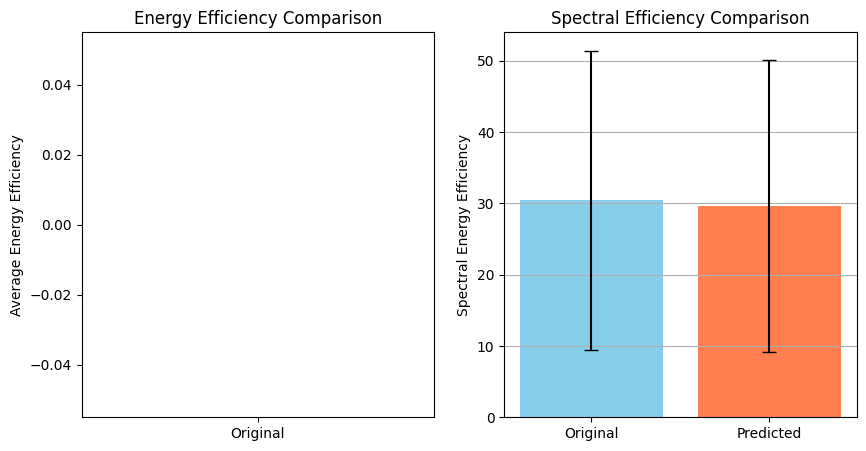

In [50]:
# Plot the energy efficiency comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # First chart for Energy Efficiency
plt.bar(x=['Original'], height=[avg_original_energy], yerr=[std_original_energy], color='skyblue', capsize=5)
plt.bar(x=['Predicted'], height=[avg_predicted_energy], yerr=[std_predicted_energy], color='coral', capsize=5)
plt.title('Energy Efficiency Comparison')
plt.ylabel('Average Energy Efficiency')

# Plot the spectral efficiency comparison
plt.subplot(1, 2, 2)  # Second chart for Spectral Efficiency
plt.bar(x=['Original'], height=[avg_original_spectral], yerr=[std_original_spectral], color='skyblue', capsize=5)
plt.bar(x=['Predicted'], height=[avg_predicted_spectral], yerr=[std_predicted_spectral], color='coral', capsize=5)
plt.title('Spectral Efficiency Comparison')
plt.ylabel('Spectral Energy Efficiency')

plt.grid(axis='y')
plt.show()